<a href="https://colab.research.google.com/github/dluciiianooo/PytestProject/blob/main/Copy_of_classificacao_de_imagens_folhas_20231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Classificador de imagens de folhas</h1>
<p>Neste documento, foram treinados 3 modelos de aprendizado de máquina que tentam detectar o tipo de folhas que são apresentadas em imagens. Um dos modelos usa o algoritmo de regressão logística (logistic regression). Outro usa um algoritmo de rede neural (neural network multi-layer perceptron). E o terceiro modelo usa o algoritmo random forest (floresta aleatória). Para treinar e testar os modelos, foram usadas imagens de folhas na resolução de 256 x 256 pixels.</p>
<p><b>Qual dos modelos treinados terá o melhor desempenho em detectar o tipo de folhas em imagens?</b></p>

Primeiramente, são carregadas as bibliotecas Python necessárias.

In [624]:
import numpy as np  # Numpy é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais e uma larga coleção de funções para trabalhar com estas estruturas.
import os, os.path  # módulo com funções para usar funcionalidades dependentes do sistema operacional, como acessar arquivos de um diretório.
import cv2 # módulo da biblioteca OPenCV para trabalhar com visão computacional, no caso deste documento, a leitura de imagens.
from google.colab.patches import cv2_imshow  # módulo para exibição de imagens.
from sklearn.model_selection import train_test_split # módulo com funções para dividir as amostras em amostras de treino e de teste.
from sklearn.neural_network import MLPClassifier # módulo que contém um algoritmo de rede neural (multi-layer perceptron).
from sklearn.linear_model import LogisticRegression # módulo que contém o algoritmo de regressão logística.
from sklearn.metrics import accuracy_score # módulo que contém funções que verificam a acurácia (desempenho) dos modelos.
from sklearn import preprocessing # módulo que contém funções de preprocessamento, como o dimensionamento (scalling) das features.
from sklearn.ensemble import RandomForestClassifier

Conecta à uma conta do Google Drive que armazena as imagens utilizadas no treinamento e teste dos modelos.

In [625]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Carrega uma das fotos armazenadas no Google Drive, apenas como exemplo para compreendermos as características (features) de uma imagem de folha. É salvo na variável imagem_exemplo um array do NumPy que contém as cores de cada pixel da imagem.

In [626]:
imagem_exemplo = cv2.imread("gdrive/MyDrive/Classroom/imagens/MOVEIS/cadeira1.jpg")

Exibe o formato do array NumPy que contém a imagem carregada. Veja que é um array de 3 dimensões (linha X coluna X cor RGB). São 256 linhas, 256 colunas e mistura para 3 cores (RGB).

In [627]:
imagem_exemplo.shape

(256, 256, 3)

Exibe o array numpy que contém a imagem carregada

In [628]:
print(imagem_exemplo)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Exibe a imagem carregada.

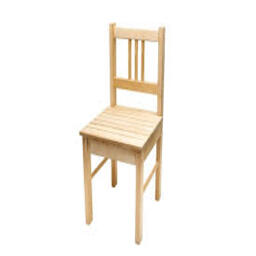

In [629]:
cv2_imshow(imagem_exemplo)

Tranforma o array NumPy de três dimensões (3D) para 1 dimensão (1D)

In [630]:
imagem_exemplo = imagem_exemplo.reshape(-1)
imagem_exemplo.shape

(196608,)

Exibe o total de características (pixels) das imagens.

In [631]:
total_características = imagem_exemplo.shape[0];
print(total_características)

196608


Exibe o novo array NumPy de 1 dimensão.

In [632]:
print(imagem_exemplo)

[255 255 255 ... 255 255 255]


A imagem carregada anteriormente foi apenas um exemplo para vermos as características de uma imagem. Agora iremos carregar do Google Drive todas as imagens, as quais chamaremos de AMOSTRAS. Estas amostras serão usadas no treinamento (70%) e nos testes (30%) dos modelos.

In [633]:
path = "gdrive/MyDrive/Classroom/imagens/MOVEIS/" # guarda em uma variável o caminho (path) do diretório dos arquivos
arquivos = os.listdir(path)   # lê todos os arquivos do diretório e cria uma lista (list) com todos os nomes dos arquivos encontrados no diretório

Exibe a lista com os nomes dos arquivos

In [634]:
arquivos

['sofa11.jpg',
 'mesa11.jpg',
 'cadeira7.jpg',
 'cadeira2.jpg',
 'cadeira9.jpg',
 'cadeira1.jpg',
 'cadeira6.jpg',
 'cadeira8.jpg',
 'cadeira3.jpg',
 'cadeira5.jpg',
 'cadeira4.jpg',
 'cadeira10.jpg',
 'mesa2.jpg',
 'mesa1.jpg',
 'mesa10.jpg',
 'mesa7.jpg',
 'mesa6.jpg',
 'mesa8.jpg',
 'mesa9.jpg',
 'mesa3.jpg',
 'mesa5.jpg',
 'mesa4.jpg',
 'sofa4.jpg',
 'sofa8.jpg',
 'sofa7.jpg',
 'sofa9.jpg',
 'sofa1.jpg',
 'sofa2.jpg',
 'sofa10.jpg',
 'sofa5.jpg',
 'sofa3.jpg',
 'sofa6.jpg',
 'sofa.15.jpg',
 'mesa.12.jpg',
 'sofa.12.jpg',
 'cadeira.13.jpg',
 'sofa.17.jpg',
 'sofa.14.jpg',
 'cadeira.12.jpg',
 'sofa.13.jpg',
 'mesa.13.jpg',
 'sofa.16.jpg']

Exibe a quantidade total de arquivos encontrados

In [635]:
quantidade_total = len(arquivos)
print("Quantidade total de amostras: " + str(quantidade_total))

Quantidade total de amostras: 42


Cria duas listas, uma para as amostras (X) e a outra para as classes (y).

In [636]:
X = np.zeros((quantidade_total, total_características))
y = np.empty((quantidade_total), dtype = object)

Carrega a lista X com as amostras e a lista y com as classes. As classes são "acalifa", "bergamoteira", "goiabeira" e "platano".

In [637]:
contador = 0
for arquivo in arquivos:
  imagem_em_3d = cv2.imread(path + arquivo)
  imagem_em_1d = imagem_em_3d.reshape(-1)
  if "MOVEIS" in arquivo: classe = "MOVEIS"
  elif "cadeira" in arquivo: classe = "cadeira"
  elif "sofa" in arquivo: classe = "sofa"
  elif "mesa" in arquivo: classe = "mesa"
  X[contador] = imagem_em_1d
  y[contador] = classe
  contador += 1

Exibe o formato da lista de amostras (X)

In [638]:
X.shape

(42, 196608)

Exibe a lista com as amostras (X)

In [639]:
print(X)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


Exibe o formato da lista de classes (y)

In [640]:
y.shape

(42,)

Exibe a lista com as classes

In [641]:
print(y)

['sofa' 'mesa' 'cadeira' 'cadeira' 'cadeira' 'cadeira' 'cadeira' 'cadeira'
 'cadeira' 'cadeira' 'cadeira' 'cadeira' 'mesa' 'mesa' 'mesa' 'mesa'
 'mesa' 'mesa' 'mesa' 'mesa' 'mesa' 'mesa' 'sofa' 'sofa' 'sofa' 'sofa'
 'sofa' 'sofa' 'sofa' 'sofa' 'sofa' 'sofa' 'sofa' 'mesa' 'sofa' 'cadeira'
 'sofa' 'sofa' 'cadeira' 'sofa' 'mesa' 'sofa']


Calcula e exibe a quantidade de cada classe

In [642]:
quantidade_cadeira = (y == 'cadeira').sum()
quantidade_sofa = (y == 'sofa').sum()
quantidade_mesa = (y == 'mesa').sum()

print("Quantidade de amostras de treino de cadeira: " + str(quantidade_cadeira))
print("Quantidade de amostras de treino de sofa: " + str(quantidade_sofa))
print("Quantidade de amostras de treino de mesa: " + str(quantidade_mesa))
print("Quantidade total de amostras de treino: " + str(quantidade_total))

Quantidade de amostras de treino de cadeira: 12
Quantidade de amostras de treino de sofa: 17
Quantidade de amostras de treino de mesa: 13
Quantidade total de amostras de treino: 42


Redimensiona (scalling) as características (features) das amostras. Com o redimensionamento, ao invés do número de cor ser um valor entre 0 e 255, será um valor dentro de um intervalo menor, entre -1 e 1. Segundo a literatura, esse redimensionamento ajuda no desempenho dos modelos de classificação.

In [643]:
scaler = preprocessing.StandardScaler().fit(X)
X_redimensionado = scaler.transform(X)

Exibe a lista com as amostras, após o redimensionamento

In [644]:
print(X_redimensionado)

[[0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 ...
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]]


Divide as amostras e as classes em amostras de treino (70%) e amostras de teste (30%)

In [645]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_redimensionado, y, test_size = 0.30)

Exibe o formato e as amostras de treino

In [646]:
print(X_treino.shape)
print(X_treino)

(29, 196608)
[[0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 ...
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]]


Exibe o formato e as classes de treino

In [647]:
print(y_treino.shape)
print(y_treino)

(29,)
['mesa' 'mesa' 'mesa' 'cadeira' 'cadeira' 'cadeira' 'cadeira' 'sofa'
 'cadeira' 'mesa' 'cadeira' 'mesa' 'sofa' 'mesa' 'sofa' 'mesa' 'mesa'
 'sofa' 'mesa' 'sofa' 'mesa' 'mesa' 'sofa' 'sofa' 'cadeira' 'sofa'
 'cadeira' 'sofa' 'sofa']


Exibe o formato e as amostras de teste

In [648]:
print(X_teste.shape)
print(X_teste)

(13, 196608)
[[0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 ...
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]
 [0.         0.         0.         ... 0.15617376 0.15617376 0.15617376]]


Exibe o formato e as classes de treino

In [649]:
print(y_teste.shape)
print(y_teste)

(13,)
['sofa' 'mesa' 'sofa' 'sofa' 'sofa' 'sofa' 'sofa' 'mesa' 'cadeira'
 'cadeira' 'sofa' 'cadeira' 'cadeira']


Mostra a quantidade de amostras de treino e de amostras de teste

In [650]:
print("Quantidade de amostras de treino: " + str(len(X_treino)))
print("Quantidade de amostras de teste: " + str(len(X_teste)))

Quantidade de amostras de treino: 29
Quantidade de amostras de teste: 13


<h1>Modelo com algoritmo de Regressão Logística (Logistic Regression)</h1>
<p>Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html</p>

Cria uma modelo de classificação multi-classes com o algoritmo de Regressão Logística com 1000 iterações (o modelo irá olhar, no máximo 1000, vezes para cada amostra e classe de treinamento).

In [651]:
modelo_lg = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

Executa a função de treinamento (fit). O MODELO É <b>TREINADO</b> a partir das amostras de treino e classes de treino.

In [652]:
modelo_lg.fit(X_treino, y_treino)

LogisticRegression(max_iter=1000, multi_class='ovr')

Executa a função de <b>TESTE</b> (predict). O modelo já treinado irá olhar para as amostras de teste e tentará acertar as classes de cada amostra. As predições do modelo são salvas na variável y_predicoes.

In [653]:
y_predicoes_lg = modelo_lg.predict(X_teste)

Exibe as classes previstas pelo modelo

In [654]:
print(y_predicoes_lg)

['mesa' 'mesa' 'sofa' 'sofa' 'cadeira' 'sofa' 'sofa' 'mesa' 'cadeira'
 'cadeira' 'sofa' 'cadeira' 'cadeira']


In [655]:
print(y_teste)

['sofa' 'mesa' 'sofa' 'sofa' 'sofa' 'sofa' 'sofa' 'mesa' 'cadeira'
 'cadeira' 'sofa' 'cadeira' 'cadeira']


Exibe a acurácia do modelo ou seja, exibe o percentual de acertos do modelo nas amostras de teste. O modelo confronta as classes de teste com as predições feitas pelo modelo. O percentual exibido é um valor entre 0 e 1. Exemplo: um valor 0.81 corresponde a 81% de acurácia, ou seja, a cada 10 amostras de treino, em 8.1 das amostras o modelo acertou a classe das folhas.

In [656]:
accuracy_score(y_teste, y_predicoes_lg)

0.8461538461538461

Realiza um teste com uma imagem específica. Pegamos apenas uma imagem de teste e vemos como o modelo treinado classificou a imagem. ELE ACERTOU?

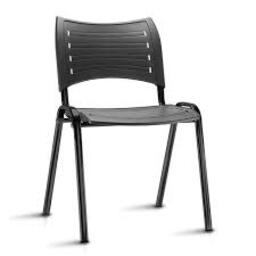

['sofa']


In [657]:
MOVEIS_TESTE = cv2.imread("gdrive/MyDrive/Classroom/imagens/MOVEIS.TESTE/cadeirateste.jpg")
cv2_imshow(MOVEIS_TESTE)
MOVEIS_TESTE = MOVEIS_TESTE.reshape(-1)
X_teste1 = np.zeros((1, total_características))
X_teste1[0] = MOVEIS_TESTE
X_teste1 = scaler.transform(X_teste1)
pred = modelo_lg.predict(X_teste1)
print(pred)

<h1>Modelo com algoritmo de Rede Neural Multilayer Perceptron (Neural Network MLP)</h1>
<p>Documentação: https://scikit-learn.org/stable/modules/neural_networks_supervised.html</p>

Cria um modelo de classificação multi-classes com o algoritmo de Rede Neural Multilayer Perceptron.

In [658]:
modelo_nn_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4), random_state=1)

Executa a função de treinamento (fit). O modelo é treinado com as amostras e classes de treino.

In [659]:
modelo_nn_mlp.fit(X_treino, y_treino)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=4, random_state=1, solver='lbfgs')

Executa a função de teste (predict). O modelo já treinado irá olhar para as amostras de teste e tentará acertar as classes de cada amostra. As predições são salvas na variável y_predicoes.

In [660]:
y_predicoes_mlp = modelo_nn_mlp.predict(X_teste)

Exibe as classes inferidas pelo modelo

In [661]:
print(y_predicoes_mlp)

['mesa' 'cadeira' 'sofa' 'sofa' 'cadeira' 'cadeira' 'cadeira' 'mesa'
 'cadeira' 'cadeira' 'cadeira' 'cadeira' 'cadeira']


Exibe a acurácia do modelo ou seja, exibe o percentual de acertos do modelo nas amostras de teste. O modelo confronta as classes de teste com as predições feitas pelo modelo. O percentual exibido é um valor entre 0 e 1. Exemplo: um valor 0.81 corresponde a 81% de acurácia, ou seja, a cada 10 amostras de treino, em 8.1 das amostras o modelo acertou a classe das folhas.

In [662]:
accuracy_score(y_teste, y_predicoes_mlp)

0.5384615384615384

Realiza um teste com uma imagem específica. Pegamos apenas uma imagem de teste e vemos como o modelo treinado classificou a imagem. ELE ACERTOU?

In [663]:
total_características = imagem_exemplo.shape[0];
print(total_características)

196608


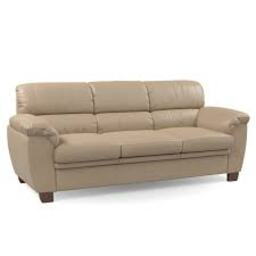

['sofa']


In [664]:
MOVEIS_TESTE = cv2.imread("gdrive/MyDrive/Classroom/imagens/MOVEIS/sofa11.jpg")
cv2_imshow(MOVEIS_TESTE)
MOVEIS_TESTE = MOVEIS_TESTE.reshape(-1)
X_teste1 = np.zeros((1, MOVEIS_TESTE.shape[0]))
X_teste1[0] = MOVEIS_TESTE
X_teste1 = scaler.transform(X_teste1)
pred = modelo_nn_mlp.predict(X_teste1)
print(pred)

<h1>Modelo com o algoritmo Floresta aleatória (Random Forest)</h1>
<p>Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</p>

In [665]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=1)

In [666]:
modelo_rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=1)

In [667]:
y_pred = modelo_rf.predict(X_teste)


In [668]:
accuracy_score(y_teste, y_pred)

0.9230769230769231

<b>Insira abaixo as células para treinar e testar um modelo RandomForest. Basicamente, são os mesmos procedimentos realizados no treinamento com os modelos LogisticRegression e MLPClassifier (Rede Neural MLP). Busque ajuda na documentação.</b>